# 일별 감성값 계산, 상관관계 구하기(변수간 & 그룹간)
https://rfriend.tistory.com/405

In [42]:
brand = '기아합본'

In [178]:
senti_cols = ['date', 'time', 'user', 'text', 'result', 'class']
senti = pd.read_csv("./감성결과/9일간감성결과/감성결과_{}.csv".format(brand), encoding = 'utf-8', names = senti_cols)
senti.head()

,date,time,user,text,result,class
0,2020-01-29,0:00:23,aparnagray,kiatennis take rafa spin . feel like need teac...,[0.11255831],[0]
1,2020-01-29,0:01:08,landerson1958,time kia !,[0.67193794],[1]
2,2020-01-29,0:01:32,blackgirlxmagic,y writer need end whole spencer layla storylin...,[0.5605302],[1]
3,2020-01-29,0:02:20,caroladventure1,kia os ... right carol . not want find delicio...,[0.32399476],[0]
4,2020-01-29,0:04:06,realacvt,write shahriar kia ncr iran publish jan. th vi...,[0.22107229],[0]


In [1]:
import numpy as np

import pandas as pd

from pandas import DataFrame
from statistics import mean

In [46]:
topictable = pd.read_csv("./합본데이터결과/병합토픽테이블_{}.csv".format(brand), encoding = 'utf-8', header = 0)

In [47]:
print(len(topictable))

103023


In [9]:
topictable[:-1]

,Unnamed: 0,Unnamed: 0.1,date,time,user,text,key,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0,2018-02-08,23:38:45,cesmith_88,queen,2018-02-0823:38:45cesmith_88,0,6.0,0.5625,"[(0, 0.062506415), (1, 0.062506415), (2, 0.062..."
1,1,1,2018-02-08,23:37:59,Olafur_Tomasson,angry wish not buy kia last year !,2018-02-0823:37:59Olafur_Tomasson,1,7.0,0.5969,"[(0, 0.017873356), (1, 0.01786835), (2, 0.2957..."
2,2,2,2018-02-08,23:37:31,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,2018-02-0823:37:31HoopVideos_NET,2,5.0,0.6288,"[(2, 0.08842112), (5, 0.62881666), (7, 0.23793..."
3,3,3,2018-02-08,23:37:03,HillaryHubOLA,kia os name lili fox just find book class read...,2018-02-0823:37:03HillaryHubOLA,3,3.0,0.3863,"[(0, 0.08687749), (1, 0.10005543), (3, 0.38631..."
4,4,4,2018-02-08,23:36:51,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,2018-02-0823:36:51HoopVideos_NET,4,5.0,0.6288,"[(2, 0.08843764), (5, 0.6287973), (7, 0.237939..."
...,...,...,...,...,...,...,...,...,...,...,...
103017,103017,25495,2019-10-01,0:01:16,zervos19,kia sportage lx fwd silver suv door view detai...,2019-10-010:01:16zervos19,103017,5.0,0.6456,"[(0, 0.0138948355), (1, 0.013894092), (2, 0.01..."
103018,103018,25496,2019-10-01,0:00:32,NewsView100,job come america great but nowhere near great ...,2019-10-010:00:32NewsView100,103018,7.0,0.8283,"[(0, 0.01041834), (1, 0.010417553), (2, 0.1091..."
103019,103019,25497,2019-10-01,0:00:17,Wayne75362249,impeachment proceeding important u . fail heal...,2019-10-010:00:17Wayne75362249,103019,5.0,0.2626,"[(0, 0.053584572), (1, 0.19662102), (3, 0.0532..."
103020,103020,25498,2019-10-01,0:00:16,Azula163,bush not pay medicare d obama take debt also ....,2019-10-010:00:16Azula163,103020,7.0,0.5588,"[(0, 0.19968088), (4, 0.1261232), (5, 0.084122..."


In [71]:
###9일치
#date = ['2020-01-29','2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06']
#date = ['2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07']
date = ['2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08']
#date = ['2019-09-23', '2019-98-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30', '2019-10-01']
###8일치
#date = ['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06']
#date = ['2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07']
#date = ['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08']

In [50]:
#필터링할 문서들의 문서번호 갖고오기
key1 = []
topic_num = 1.0
print(topictable.groupby('가장 비중이 높은 토픽').size())
#print(filter_doc)
print(type(topictable))
#print(topictable['가장 비중이 높은 토픽'][3]) test용 
with open('./{}_{}_0.5이상문서번호.txt'.format(brand, topic_num), 'w') as f:
    for i in range(len(topictable)):
        if topictable['가장 비중이 높은 토픽'][i] == topic_num :
            #filter_doc.append(topictable['문서 번호'][i])
            if topictable['가장 높은 토픽의 비중'][i] >= 0.5 :  #걸러야 할것. 2.0이 너무 확률이 큰 것.
                key1.append(topictable['key'][i])
                f.write(str(topictable['key'][i])+"\n") #불러올 때 string = f.read()후, string.split("\n")할 것
#print(filter_doc)
print(len(key1))
print(key1)

가장 비중이 높은 토픽
0.0     8963
1.0     2849
2.0    13655
3.0    14873
4.0    17891
5.0    11036
6.0     7809
7.0    25947
dtype: int64
<class 'pandas.core.frame.DataFrame'>
1048
['2018-02-0821:09:10Aliya313', '2018-02-0820:53:55andyaustinphoto', '2018-02-0820:27:39Bilalkhan_01', '2018-02-0820:09:38Mudassirkhanshb', '2018-02-0818:24:03DiegoES_Fretes', '2018-02-0817:57:29CreatedByZheno', '2018-02-0817:42:27whatt_eva', '2018-02-0816:59:37BandomanClai', '2018-02-0816:44:30Maazkhans85', '2018-02-0816:30:37EverettStAuto', '2018-02-0815:35:43leonngsz', '2018-02-0814:14:56yommy_personal', '2018-02-0813:39:13amal_786', '2018-02-0813:33:42AzeemAftab_', '2018-02-0812:47:22iamsrkbiloti', '2018-02-0810:56:02mananpaniforev1', '2018-02-089:58:15KashifSukhera5', '2018-02-088:57:08RNaumanKhalid', '2018-02-088:53:32Muhammad7277', '2018-02-088:08:15MAhmad704', '2018-02-086:42:23xEmxnye_', '2018-02-085:49:02netstartraffic', '2018-02-085:44:58zinterIudes', '2018-02-085:21:46netstartraffic', '2018-02-084:03:56Ba

In [51]:
#필터링할 문서들의 문서번호 갖고오기
key2 = []
topic_num = 2.0
print(topictable.groupby('가장 비중이 높은 토픽').size())
#print(filter_doc)
print(type(topictable))
#print(topictable['가장 비중이 높은 토픽'][3]) test용 
with open('./{}_{}_0.5이상문서번호.txt'.format(brand, topic_num), 'w') as f:
    for i in range(len(topictable)):
        if topictable['가장 비중이 높은 토픽'][i] == topic_num :
            #filter_doc.append(topictable['문서 번호'][i])
            if topictable['가장 높은 토픽의 비중'][i] >= 0.5 :  #걸러야 할것. 2.0이 너무 확률이 큰 것.
                key2.append(topictable['key'][i])
                f.write(str(topictable['key'][i])+"\n") #불러올 때 string = f.read()후, string.split("\n")할 것
#print(filter_doc)
print(len(key2))
print(key2)

가장 비중이 높은 토픽
0.0     8963
1.0     2849
2.0    13655
3.0    14873
4.0    17891
5.0    11036
6.0     7809
7.0    25947
dtype: int64
<class 'pandas.core.frame.DataFrame'>
4612
['2018-02-0823:01:31Aneerinyourear', '2018-02-0822:56:21TheHat2', '2018-02-0822:27:56chuzautomotive', '2018-02-0822:17:56Derekosb', '2018-02-0822:15:56absolutelyariy', '2018-02-0822:13:41alinbody__', '2018-02-0821:58:313Boys_OldLady', '2018-02-0821:46:07tusharrjaiswal2', '2018-02-0821:38:30ghazia_waqar', '2018-02-0821:30:16slklman', '2018-02-0821:28:04_____Donne', '2018-02-0821:22:29UmakorTony', '2018-02-0821:20:04wwsnoopy1', '2018-02-0821:17:08allearsandnose', '2018-02-0820:46:02its_ashleyyboo', '2018-02-0820:42:00Mayaruddin_', '2018-02-0820:40:21artsyoffspring', '2018-02-0820:36:35SayyarGul_', '2018-02-0820:20:56PhilSmithAuto', '2018-02-0820:18:34PhilSmithAuto', '2018-02-0819:37:25slickric_', '2018-02-0819:30:15AutoAlertCXM', '2018-02-0819:13:35Alpha_Intell', '2018-02-0819:05:02Soban_Raheem', '2018-02-0818:52:41Za

In [52]:
#필터링할 문서들의 문서번호 갖고오기
key3 = []
topic_num = 6.0
print(topictable.groupby('가장 비중이 높은 토픽').size())
#print(filter_doc)
print(type(topictable))
#print(topictable['가장 비중이 높은 토픽'][3]) test용 
with open('./{}_{}_0.5이상문서번호.txt'.format(brand, topic_num), 'w') as f:
    for i in range(len(topictable)):
        if topictable['가장 비중이 높은 토픽'][i] == topic_num :
            #filter_doc.append(topictable['문서 번호'][i])
            if topictable['가장 높은 토픽의 비중'][i] >= 0.5 :  #걸러야 할것. 2.0이 너무 확률이 큰 것.
                key3.append(topictable['key'][i])
                f.write(str(topictable['key'][i])+"\n") #불러올 때 string = f.read()후, string.split("\n")할 것
#print(filter_doc)
print(len(key3))
print(key3)

가장 비중이 높은 토픽
0.0     8963
1.0     2849
2.0    13655
3.0    14873
4.0    17891
5.0    11036
6.0     7809
7.0    25947
dtype: int64
<class 'pandas.core.frame.DataFrame'>
3219
['2018-02-0823:38:45cesmith_88', '2018-02-0823:34:36DJJesusBeats', '2018-02-0823:34:36Hot316Radio', '2018-02-0823:12:07pretty_lenee', '2018-02-0823:00:49fatima_says_', '2018-02-0822:54:58UWGAthletics', '2018-02-0822:44:01TifeBollz', '2018-02-0822:09:02JonesRecovery', '2018-02-0821:53:21mamadevxx', '2018-02-0821:07:44Marine39284927', '2018-02-0820:40:23LajawaB_Shairii', '2018-02-0820:16:32HappyRichTV', '2018-02-0820:08:35MWbluemoon', '2018-02-0819:55:20SqueezeDeez', '2018-02-0819:53:06SMWLagos', '2018-02-0819:50:47WOMACtweets', '2018-02-0819:48:03sendmeafriend', '2018-02-0819:14:19FarihaMunirShah', '2018-02-0819:11:42_Affi_A', '2018-02-0818:56:12guswo0346', '2018-02-0818:38:54jheonie', '2018-02-0818:36:11MinesAthletics', '2018-02-0818:22:27trisha_kohli', '2018-02-0818:11:35iamsrkbiloti', '2018-02-0818:04:25cheerUPDAT

In [53]:
key_list = key1 + key2 + key3

In [54]:
key_list

['2018-02-0821:09:10Aliya313',
 '2018-02-0820:53:55andyaustinphoto',
 '2018-02-0820:27:39Bilalkhan_01',
 '2018-02-0820:09:38Mudassirkhanshb',
 '2018-02-0818:24:03DiegoES_Fretes',
 '2018-02-0817:57:29CreatedByZheno',
 '2018-02-0817:42:27whatt_eva',
 '2018-02-0816:59:37BandomanClai',
 '2018-02-0816:44:30Maazkhans85',
 '2018-02-0816:30:37EverettStAuto',
 '2018-02-0815:35:43leonngsz',
 '2018-02-0814:14:56yommy_personal',
 '2018-02-0813:39:13amal_786',
 '2018-02-0813:33:42AzeemAftab_',
 '2018-02-0812:47:22iamsrkbiloti',
 '2018-02-0810:56:02mananpaniforev1',
 '2018-02-089:58:15KashifSukhera5',
 '2018-02-088:57:08RNaumanKhalid',
 '2018-02-088:53:32Muhammad7277',
 '2018-02-088:08:15MAhmad704',
 '2018-02-086:42:23xEmxnye_',
 '2018-02-085:49:02netstartraffic',
 '2018-02-085:44:58zinterIudes',
 '2018-02-085:21:46netstartraffic',
 '2018-02-084:03:56BasketbolNation',
 '2018-02-082:02:58philsportsdotph',
 '2018-02-081:27:16pbalive1',
 '2018-02-081:24:36vox_populi2020',
 '2018-02-081:17:33CallMeCadej

In [55]:
print(len(key_list))

8879


In [56]:
#중복 문헌 찾기
dataframe = pd.DataFrame()
for i in range(len(key_list)):
    key = key_list[i]
    if key in topictable['key'].tolist():
        #dupdata.append('{}'.format(df1.loc[df1['Wintelips key']== key, ['Wintelips key', '패밀리 문헌번호 (출원기준)', '출원번호', '출원일', '출원인', '요약', '대표청구항', '인용 문헌번호 (F1) + 심사관(E) 인용 (KR,US)']]))
        dataframe = dataframe.append(topictable.loc[topictable['key'] == key, ['Unnamed: 0','Unnamed: 0.1','date','time','user', 'text', 'key','문서 번호','가장 비중이 높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']], ignore_index=True)

In [57]:
dataframe[:-1]

,Unnamed: 0,Unnamed: 0.1,date,time,user,text,key,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,215,215,2018-02-08,21:09:10,Aliya313,ye childhood version hay apka ? ? ? ? ? ? ? ? ...,2018-02-0821:09:10Aliya313,215,1.0,0.5190,"[(1, 0.51901174), (2, 0.116071664), (6, 0.3352..."
1,235,235,2018-02-08,20:53:55,andyaustinphoto,get wickedly talented friend . kia john advent...,2018-02-0820:53:55andyaustinphoto,235,1.0,0.5104,"[(1, 0.51040477), (3, 0.21739991), (7, 0.23073..."
2,270,270,2018-02-08,20:27:39,Bilalkhan_01,barda chutyapa kia hai wesay zardari ko shirt ...,2018-02-0820:27:39Bilalkhan_01,270,1.0,0.5634,"[(1, 0.5633786), (2, 0.26570898), (4, 0.071262..."
3,295,295,2018-02-08,20:09:38,Mudassirkhanshb,waah kia logic hy,2018-02-0820:09:38Mudassirkhanshb,295,1.0,0.7809,"[(0, 0.03128788), (1, 0.7809142), (2, 0.031313..."
4,498,498,2018-02-08,18:24:03,DiegoES_Fretes,hahaha,2018-02-0818:24:03DiegoES_Fretes,498,1.0,0.5624,"[(0, 0.062503844), (1, 0.5624191), (2, 0.06255..."
...,...,...,...,...,...,...,...,...,...,...,...
8878,102674,25152,2019-10-01,1:09:36,Ajay_lovesyou,mad af,2019-10-011:09:36Ajay_lovesyou,102674,6.0,0.5625,"[(0, 0.06250603), (1, 0.06250603), (2, 0.06250..."
8879,102713,25191,2019-10-01,1:00:13,MECGinc,ca not dislike .,2019-10-011:00:13MECGinc,102713,6.0,0.5623,"[(0, 0.062535465), (1, 0.062535465), (2, 0.062..."
8880,102806,25284,2019-10-01,0:43:19,loonacxbello,omg kia,2019-10-010:43:19loonacxbello,102806,6.0,0.7081,"[(0, 0.041699734), (1, 0.04169122), (2, 0.0417..."
8881,102860,25338,2019-10-01,0:32:09,SamSidneyTe,sister plant ... .wait mexico .,2019-10-010:32:09SamSidneyTe,102860,6.0,0.6145,"[(0, 0.025003038), (1, 0.025003038), (2, 0.025..."


In [62]:
#중복열 제거(key라는 행 기준으로)
filtered_topictable = dataframe.drop_duplicates(['key'])
len(filtered_topictable)

8878

In [66]:
#기존 데이터프레임에서 무관한토픽의 데이터프레임 빼기
merge = topictable[~topictable.key.isin(filtered_topictable.key)]
merge[:-1] #length = 94140
len(merge)

94141

In [65]:
merge.dropna(subset = ['date'])
len(merge)

94141

In [67]:
merge.to_csv('./합본데이터결과/{}_외국어문헌제외토픽테이블.csv'.format(brand), encoding = 'utf-8')

In [2]:
import pandas as pd
merge = pd.read_csv('./합본데이터결과/{}_외국어문헌제외토픽테이블.csv'.format(brand), encoding = 'utf-8')

In [3]:
query = '2018kia'

In [4]:
senti = senti_cols = ['date', 'time', 'user', 'text', 'result', 'class']
senti = pd.read_csv("./감성결과/9일간감성결과/감성결과_{}.csv".format(query), encoding = 'utf-8', names = senti_cols)
senti.head()

,date,time,user,text,result,class
0,2018-01-31,23:59:17,mrchriststout,kia puhm delivers ongoing customer success,[0.9119627],[1]
1,2018-01-31,23:58:37,KyoceraD,anyone wan na buy kia soul,[0.8229007],[1]
2,2018-01-31,23:57:17,ChristchurchLib,kia os ! awesome news congrat . dr,[0.9544464],[1]
3,2018-01-31,23:56:44,bobsheiskawy,sound nice but still love see soul .,[0.02272391],[0]
4,2018-01-31,23:56:28,SSmithNY,ooh ! get sneak preview kia super bowl commerc...,[0.51386654],[1]


In [5]:
senti['key'] = senti['date'] + senti['time'] + senti['user']
senti.head()

,date,time,user,text,result,class,key
0,2018-01-31,23:59:17,mrchriststout,kia puhm delivers ongoing customer success,[0.9119627],[1],2018-01-3123:59:17mrchriststout
1,2018-01-31,23:58:37,KyoceraD,anyone wan na buy kia soul,[0.8229007],[1],2018-01-3123:58:37KyoceraD
2,2018-01-31,23:57:17,ChristchurchLib,kia os ! awesome news congrat . dr,[0.9544464],[1],2018-01-3123:57:17ChristchurchLib
3,2018-01-31,23:56:44,bobsheiskawy,sound nice but still love see soul .,[0.02272391],[0],2018-01-3123:56:44bobsheiskawy
4,2018-01-31,23:56:28,SSmithNY,ooh ! get sneak preview kia super bowl commerc...,[0.51386654],[1],2018-01-3123:56:28SSmithNY


In [7]:
senti[:-1]

,date,time,user,text,result,class,key
0,2018-01-31,23:59:17,mrchriststout,kia puhm delivers ongoing customer success,[0.9119627],[1],2018-01-3123:59:17mrchriststout
1,2018-01-31,23:58:37,KyoceraD,anyone wan na buy kia soul,[0.8229007],[1],2018-01-3123:58:37KyoceraD
2,2018-01-31,23:57:17,ChristchurchLib,kia os ! awesome news congrat . dr,[0.9544464],[1],2018-01-3123:57:17ChristchurchLib
3,2018-01-31,23:56:44,bobsheiskawy,sound nice but still love see soul .,[0.02272391],[0],2018-01-3123:56:44bobsheiskawy
4,2018-01-31,23:56:28,SSmithNY,ooh ! get sneak preview kia super bowl commerc...,[0.51386654],[1],2018-01-3123:56:28SSmithNY
...,...,...,...,...,...,...,...
23031,2018-02-08,0:03:28,RickPetree,simply mean fsa ? ? fight take casualty . turk...,[0.51298517],[1],2018-02-080:03:28RickPetree
23032,2018-02-08,0:02:58,unlimitedcarssa,use kia sportage ex fwd sale atlanta ga unlimi...,[0.7781524],[1],2018-02-080:02:58unlimitedcarssa
23033,2018-02-08,0:02:34,MrMarkus_229,get ta check honda kia settle,[0.21236995],[0],2018-02-080:02:34MrMarkus_229
23034,2018-02-08,0:00:32,heridwipurnomo,amaze ! ! ! kia cadenza interior review,[0.67792124],[1],2018-02-080:00:32heridwipurnomo


In [23]:
senti_merge_topictable = merge[merge.key.isin(senti.key)]
senti_merge_topictable = pd.merge(senti_merge_topictable, senti, how = 'inner')
senti_merge_topictable = senti_merge_topictable.drop_duplicates()
senti_merge_topictable[:-1]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,time,user,text,key,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중,result,class
0,1,1,1,2018-02-08,23:37:59,Olafur_Tomasson,angry wish not buy kia last year !,2018-02-0823:37:59Olafur_Tomasson,1,7.0,0.5969,"[(0, 0.017873356), (1, 0.01786835), (2, 0.2957...",[0.98016346],[1]
1,2,2,2,2018-02-08,23:37:31,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,2018-02-0823:37:31HoopVideos_NET,2,5.0,0.6288,"[(2, 0.08842112), (5, 0.62881666), (7, 0.23793...",[0.60101813],[1]
2,3,3,3,2018-02-08,23:37:03,HillaryHubOLA,kia os name lili fox just find book class read...,2018-02-0823:37:03HillaryHubOLA,3,3.0,0.3863,"[(0, 0.08687749), (1, 0.10005543), (3, 0.38631...",[0.08078703],[0]
3,4,4,4,2018-02-08,23:36:51,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,2018-02-0823:36:51HoopVideos_NET,4,5.0,0.6288,"[(2, 0.08843764), (5, 0.6287973), (7, 0.237939...",[0.60101813],[1]
4,5,5,5,2018-02-08,23:36:36,RamknickL,just ! recently add kia sorento inventory . check,2018-02-0823:36:36RamknickL,5,5.0,0.6387,"[(0, 0.020846326), (1, 0.020849146), (2, 0.020...",[0.9865333],[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21228,23030,23030,23030,2018-01-31,0:03:24,dredimachine15,fee like ppl buy kia also expect car total nex...,2018-01-310:03:24dredimachine15,23030,3.0,0.3899,"[(0, 0.012490267), (1, 0.123814344), (2, 0.012...",[0.61571634],[1]
21229,23032,23032,23032,2018-01-31,0:02:05,MonikiIIa,blake griffin overrate dunked kia year ago ove...,2018-01-310:02:05MonikiIIa,23032,4.0,0.6252,"[(0, 0.024886746), (1, 0.22533132), (2, 0.0248...",[0.63478446],[1]
21230,23033,23033,23033,2018-01-31,0:01:22,zinterIudes,hate kia fell asleep fuxjinf earlt ive bore day,2018-01-310:01:22zinterIudes,23033,7.0,0.5135,"[(0, 0.017837536), (1, 0.017835714), (2, 0.017...",[0.07587528],[0]
21231,23034,23034,23034,2018-01-31,0:00:50,CountryCar1,kia stinger gt rear wheel drive korean style !...,2018-01-310:00:50CountryCar1,23034,4.0,0.5653,"[(3, 0.21603478), (4, 0.56527346), (5, 0.17081...",[0.4945447],[0]


In [36]:
senti_merge_topictable = senti_merge_topictable.dropna()
senti_merge_topictable.to_csv('./합본데이터결과/감성토픽결과_외국어문헌제외_{}_{}.csv'.format(brand, query), encoding = 'utf-8')

In [37]:
result = []
cla = []
total = []
for d in date:
    result_date = []
    class_date = []
    for i in range(len(senti_merge_topictable)):
        if senti_merge_topictable['date'][i] == d:
            doc = str(senti_merge_topictable['result'][i])
            doc = doc.replace("[", "").replace("]", "")
            count = str(senti_merge_topictable['class'][i])
            count = count.replace("[", "").replace("]", "")
            doc = float(doc)
            count= int(count)
            result_date.append(doc)
            class_date.append(count)
    print(d , mean(result_date))
    result.append(float(mean(result_date)))
    total.append(int(len(class_date)))
    cla.append(int(sum(class_date)))

KeyError: 14

In [ ]:
brand = '기아합본_외국어문헌제외토픽테이블'

# 여기서부터 불러와서 돌리면 됨

In [2]:
#합본감성결과
import pandas as pd
cols = ['i','date', 'time', 'user', 'text', 'results', 'classes', 'key','문서 번호','가장 비중이 높은 토픽','가장 높은 토픽의 비중'] #'각 토픽의 비중'
file = pd.read_csv('./감성결과/9일간감성결과/감성결과3_기아합본_외국어문헌제외토픽테이블.csv', encoding = 'utf-8', names = cols)
print(len(file))

94141


In [3]:
file.head()

,i,date,time,user,text,results,classes,key,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중
0,0,2018-02-08,23:37:59,Olafur_Tomasson,angry wish not buy kia last year !,[0.1980812],[0],2018-02-0823:37:59Olafur_Tomasson,1,7.0,0.5969
1,1,2018-02-08,23:37:31,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,[0.94263864],[1],2018-02-0823:37:31HoopVideos_NET,2,5.0,0.6288
2,2,2018-02-08,23:37:03,HillaryHubOLA,kia os name lili fox just find book class read...,[0.04509246],[0],2018-02-0823:37:03HillaryHubOLA,3,3.0,0.3863
3,3,2018-02-08,23:36:51,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,[0.94263864],[1],2018-02-0823:36:51HoopVideos_NET,4,5.0,0.6288
4,4,2018-02-08,23:36:36,RamknickL,just ! recently add kia sorento inventory . check,[0.6637374],[1],2018-02-0823:36:36RamknickL,5,5.0,0.6387


In [4]:
file.isnull().values.any()

True

In [5]:
null_df = file[file.isnull().values.any(axis=1)]
null_df

,i,date,time,user,text,results,classes,key,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중
14,14,2018-02-08,23:32:43,Jimiginger__,NaN,[0.07912299],[0],2018-02-0823:32:43Jimiginger__,17,0.0,0.125
3559,3559,2018-02-07,5:01:10,Phly_By_Nature,NaN,[0.07912299],[0],2018-02-075:01:10Phly_By_Nature,4020,0.0,0.125
3708,3708,2018-02-07,3:58:31,DariGottaSpeak,NaN,[0.07912299],[0],2018-02-073:58:31DariGottaSpeak,4175,0.0,0.125
3990,3990,2018-02-07,1:44:10,redranger300,NaN,[0.07912299],[0],2018-02-071:44:10redranger300,4471,0.0,0.125
6992,6992,2018-02-05,15:14:31,alixbrooksxo_,NaN,[0.07912299],[0],2018-02-0515:14:31alixbrooksxo_,7756,0.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...
93749,93749,2019-10-01,1:22:17,gycho8,NaN,[0.07912299],[0],2019-10-011:22:17gycho8,102613,0.0,0.125
93800,93800,2019-10-01,1:11:30,James65453154,NaN,[0.07912299],[0],2019-10-011:11:30James65453154,102667,0.0,0.125
93825,93825,2019-10-01,1:03:57,long_standing,NaN,[0.07912299],[0],2019-10-011:03:57long_standing,102695,0.0,0.125
93834,93834,2019-10-01,1:02:07,hhjphoto,NaN,[0.07912299],[0],2019-10-011:02:07hhjphoto,102706,0.0,0.125


In [6]:
file = file.fillna({'text':" "})

In [7]:
file.isnull().values.any()

False

In [8]:
file.head()

,i,date,time,user,text,results,classes,key,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중
0,0,2018-02-08,23:37:59,Olafur_Tomasson,angry wish not buy kia last year !,[0.1980812],[0],2018-02-0823:37:59Olafur_Tomasson,1,7.0,0.5969
1,1,2018-02-08,23:37:31,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,[0.94263864],[1],2018-02-0823:37:31HoopVideos_NET,2,5.0,0.6288
2,2,2018-02-08,23:37:03,HillaryHubOLA,kia os name lili fox just find book class read...,[0.04509246],[0],2018-02-0823:37:03HillaryHubOLA,3,3.0,0.3863
3,3,2018-02-08,23:36:51,HoopVideos_NET,kia rookie ladder josh jackson enters mix ben ...,[0.94263864],[1],2018-02-0823:36:51HoopVideos_NET,4,5.0,0.6288
4,4,2018-02-08,23:36:36,RamknickL,just ! recently add kia sorento inventory . check,[0.6637374],[1],2018-02-0823:36:36RamknickL,5,5.0,0.6387


In [82]:
brand = '앱티브kia_외국어문헌제외'

In [83]:
###9일치
#date = ['2020-01-29','2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06']
#date = ['2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07']
#date = ['2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08']
date = ['2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30', '2019-10-01']
###8일치
#date = ['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06']
#date = ['2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07']
#date = ['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08']

In [84]:
from statistics import mean
import numpy as np
result = []
cla = []
total = []
for d in date:
    #result_date = []
    class_date = []
    for i in range(len(file)):
        if  file['date'][i] == d:
            #doc = str(file['results'][i])
            #doc = doc.replace("[", "").replace("]", "")
            count = str(file['classes'][i])
            count = count.replace("[", "").replace("]", "")
            #doc = float(doc)
            count= int(count)
            #result_date.append(doc)
            class_date.append(count)
    #print(d , np.mean(result_date)) #에러 발생지점
    #result.append(float(np.mean(result_date)))
    total.append(int(len(class_date)))
    cla.append(int(sum(class_date)))

In [85]:
#print(result)
print(cla)
print(total)

[1073, 1011, 1050, 1060, 1085, 988, 922, 4525, 2081]
[1877, 1768, 1748, 1844, 1850, 1695, 1646, 7202, 3600]


In [86]:
ratio = []
for i in range(len(cla)):
    ratio.append(cla[i]/total[i])

In [87]:
print(ratio)

[0.5716568993074055, 0.5718325791855203, 0.6006864988558352, 0.5748373101952278, 0.5864864864864865, 0.5828908554572272, 0.560145808019441, 0.6282976950846987, 0.5780555555555555]


In [88]:
percentage = []
for i in range(len(ratio)):
    percentage.append(ratio[i]*100)

In [89]:
dict = {'date':date, 'class':cla,'count': total,'positive_rate': ratio, 'percentage': percentage }  
df = pd.DataFrame(dict)
df =df.set_index(list(df)[0])
df.to_csv("./감성결과/9일간감성결과/최종_{}_감성점수와비율.csv".format(brand), encoding = 'utf-8')

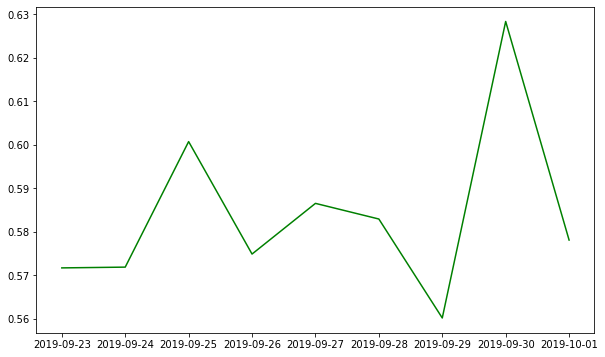

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(date,ratio, color = 'green')
plt.savefig('./감성결과/9일간감성결과/최종_{}_감성추이.png'.format(brand), dpi = 100)

# 여기까지

In [185]:
price = []
for i in range(len(stock)):
    price.append(stock['종가'][i])
    print(type(stock['종가'][i]))
print(price)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
[42550, 41950, 40900, 40900, 40900, 40100, 40250, 39400, 41300]


In [186]:
'''
#8일치때
price = price[1:]
print(price)
'''

'\n#8일치때\nprice = price[1:]\nprint(price)\n'

In [187]:
#공분산 분석
import numpy as np
#평균을 0으로 맞추기
def de_mean(x):   
    #x의 모든 데이터 포인트에서 평균을 뺌
    n = len(x)
    x_bar = sum(x) / n
    return [x_i - x_bar for x_i in x]

# 분산
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    sum_of_squares = sum([x_i ** 2 for x_i in deviations])
    return sum_of_squares / (n - 1)

# 표준편차
def standard_deviation(x):
    return variance(x) ** 0.5

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [188]:
np.cov(result, price)

array([[8.93646171e-05, 2.37756825e+00],
       [2.37756825e+00, 9.11875000e+05]])

In [189]:
print("result, price cov")
print(covariance(result, price))
print("ratio, price cov")
print(covariance(ratio, price))
print("total, price cov")
print(covariance(ratio, price))

result, price cov
2.377568251594693
ratio, price cov
2.1333682281540973
total, price cov
2.1333682281540973


In [190]:
print("result, price corr")
print(correlation(result, price))
print("ratio, price corr")
print(correlation(ratio, price))
print("total, price corr")
print(correlation(ratio, price))

result, price corr
0.2633798456394698
ratio, price corr
0.14544274614759609
total, price corr
0.14544274614759609


In [191]:
dict = {'date':date, 'mean': result, 'positive_rate': ratio,'count': total ,'price': price}  
df = DataFrame(dict)
df =df.set_index(list(df)[0])
df.to_csv("./감성결과/9일간감성결과/{}_감성점수와비율.csv".format(brand))

In [192]:
corr = df.corr(method = 'pearson') 
corr

,mean,positive_rate,count,price
mean,1.000000,0.953441,-0.678616,0.263380
positive_rate,0.953441,1.000000,-0.761186,0.145443
count,-0.678616,-0.761186,1.000000,-0.279285
price,0.263380,0.145443,-0.279285,1.000000


In [193]:
corr.to_csv('./상관관계/상관관계결과_{}.csv'.format(brand), encoding = 'utf-8')

# heatmap 그리기

In [194]:
import matplotlib.pyplot as plt 
import seaborn as sns

cbar는 오른쪽에 있는 막대(범주)를 표시하는 것입니다.

annot는 상관계수를 표시합니다.

annot_kws는 상관계수의 글자 크기를 지정합니다.

fmt 는 상관계수의 소수점 자리수를 지정합니다.

square는 정사각형으로 지정하는 것이며, False로 설정 시 직사각형이 됩니다.

cmap은 색상을 지정합니다.



출처: https://sno-machinelearning.tistory.com/68 [스노의 머신러닝 스터디 정리]

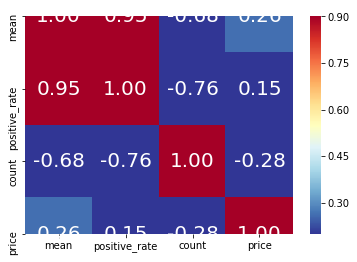

In [195]:
plt.figure(figsize = (6,4))
test_heatmap = sns.heatmap(corr, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, vmax = 0.9, annot = True , annot_kws={'size' : 20},  fmt = '.2f')
plt.show()

In [196]:
fig = test_heatmap.get_figure()    
fig.savefig('./상관관계/상관관계_{}.png'.format(brand), dpi=100)